In [1]:
import os
os.chdir('../..')

In [2]:
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.font_manager as font_manager

mpl.rc_file('./code/mplrc')


# Add every font at the specified location
font_dir = ['/Users/alelouis/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'JetBrains Mono'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
n_samples = 2**16
fs = 1e6
t = np.arange(n_samples)/fs
f = fs/16
p = 1
signal = np.sqrt(p)*np.exp(2j*np.pi*f*t)
p_n = 1
noise = np.sqrt(p_n/2)*(np.random.randn(n_samples)+1j*np.random.randn(n_samples))
signal_and_noise = signal+noise

nfft = 2**8
signal_and_noise_reshape = np.reshape(signal_and_noise, (signal_and_noise.size//nfft, nfft))
signal_fft = np.fft.fft(signal_and_noise_reshape, axis = 1)/nfft
signal_psd_db = 10*np.log10(np.mean(np.abs(signal_fft)**2, axis = 0))
frequencies = np.fft.fftfreq(nfft, 1/fs)/1e6

n0_display = p_n/nfft
n0 = p_n/fs

In [33]:
path = './static/images/noise-floor'

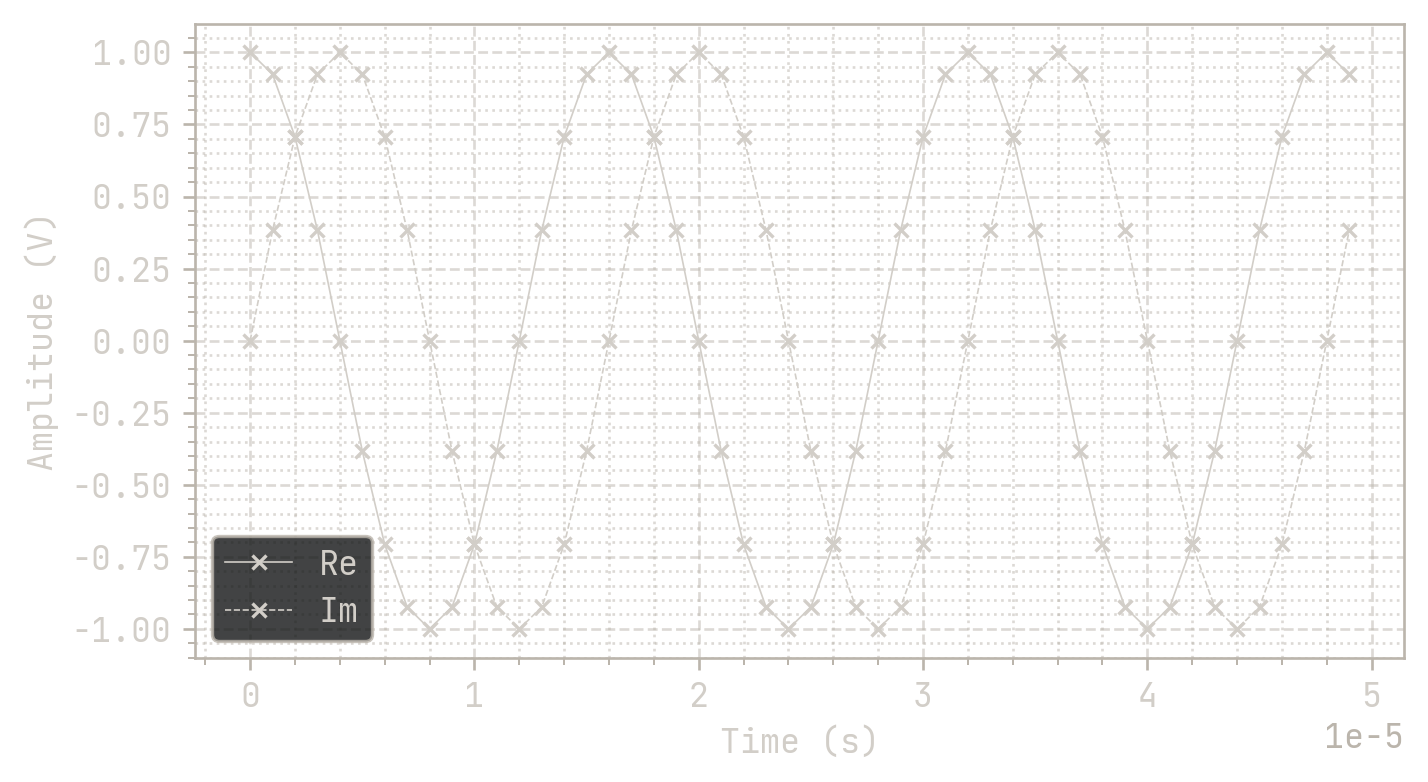

In [34]:
plt.figure(dpi=120, figsize = (6.5, 3.5))
plt.plot(t[0:50], signal[0:50].real, linewidth = 0.5, marker = "x", markersize=4, label = "Re")
plt.plot(t[0:50], signal[0:50].imag, linewidth = 0.5, linestyle="--", marker = "x", markersize=4, label = "Im")
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--", alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.savefig(f'{path}/temporal.svg', dpi=72, transparent=True, bbox_inches='tight')

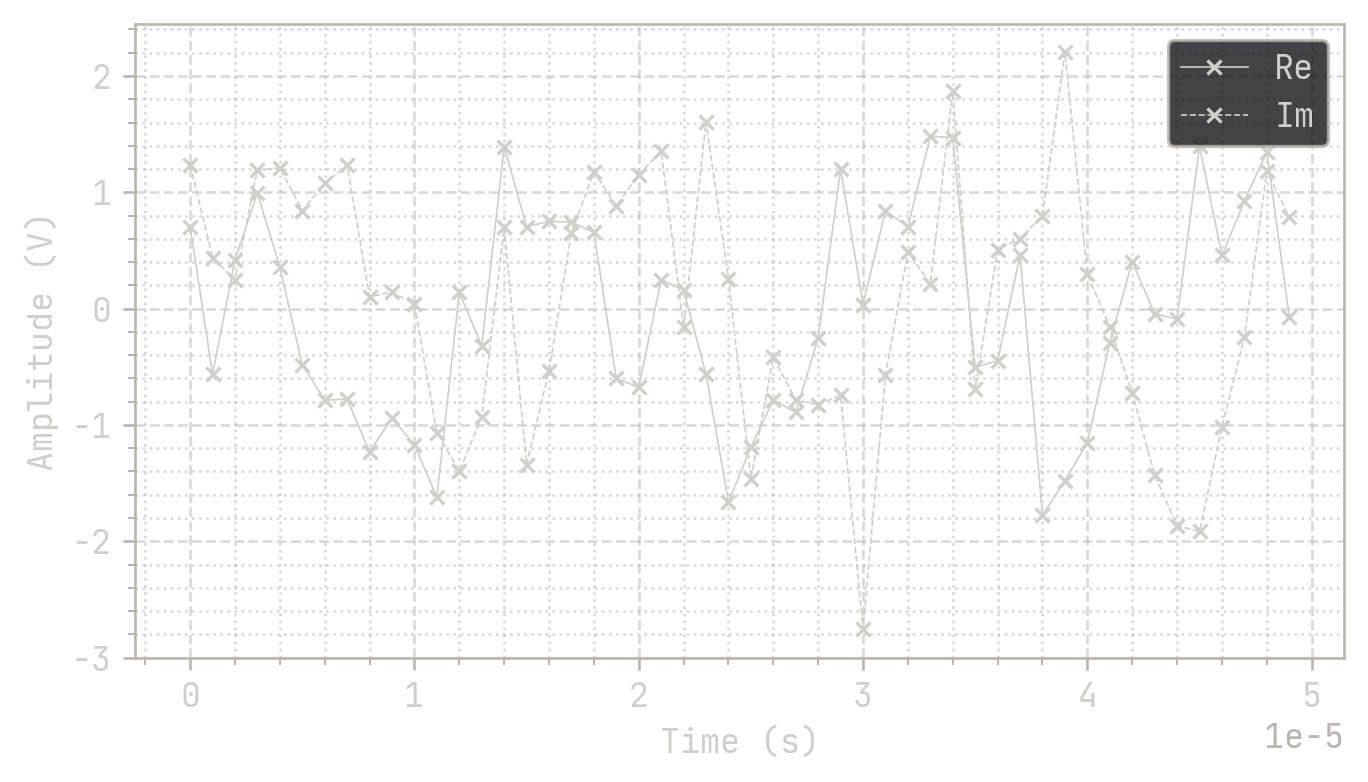

In [35]:
plt.figure(dpi=120, figsize = (6.5, 3.5))
plt.plot(t[0:50], signal_and_noise[0:50].real, linewidth = 0.5, marker = "x", markersize=4, label = "Re")
plt.plot(t[0:50], signal_and_noise[0:50].imag, linewidth = 0.5, linestyle="--", marker = "x", markersize=4, label = "Im")
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--", alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.savefig(f'{path}/temporal-noisy.svg', dpi=72, transparent=True, bbox_inches='tight')

In [41]:
10*np.log10(n0)

-60.0

In [37]:
10*np.log10(n0_display) - 10*np.log10(fs) + 10*np.log10(nfft)

-60.0

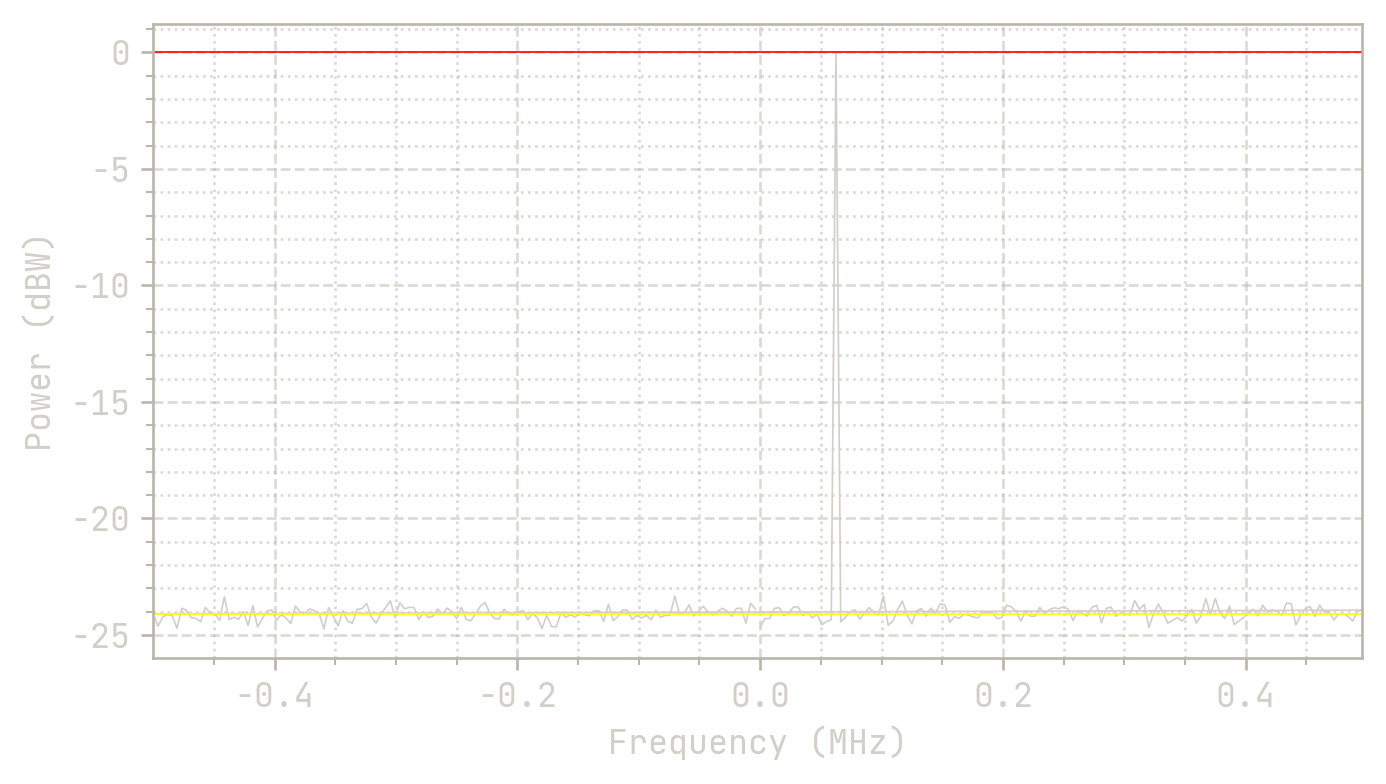

In [43]:
plt.figure(dpi=120, figsize = (6.5, 3.5))
plt.plot(frequencies, signal_psd_db, linewidth = 0.5)
plt.hlines(y=np.max(10*np.log10(np.var(signal))), xmin = np.min(frequencies), xmax = np.max(frequencies), linewidths = 0.5, colors = 'r')
plt.hlines(y=10*np.log10(n0_display), xmin = np.min(frequencies), xmax = np.max(frequencies), linewidths = 0.5, colors = 'yellow')
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--", alpha = 0.5)
plt.xlim([np.min(frequencies), np.max(frequencies)])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBW)')
plt.savefig(f'{path}/psd.svg', dpi=72, transparent=True, bbox_inches='tight')

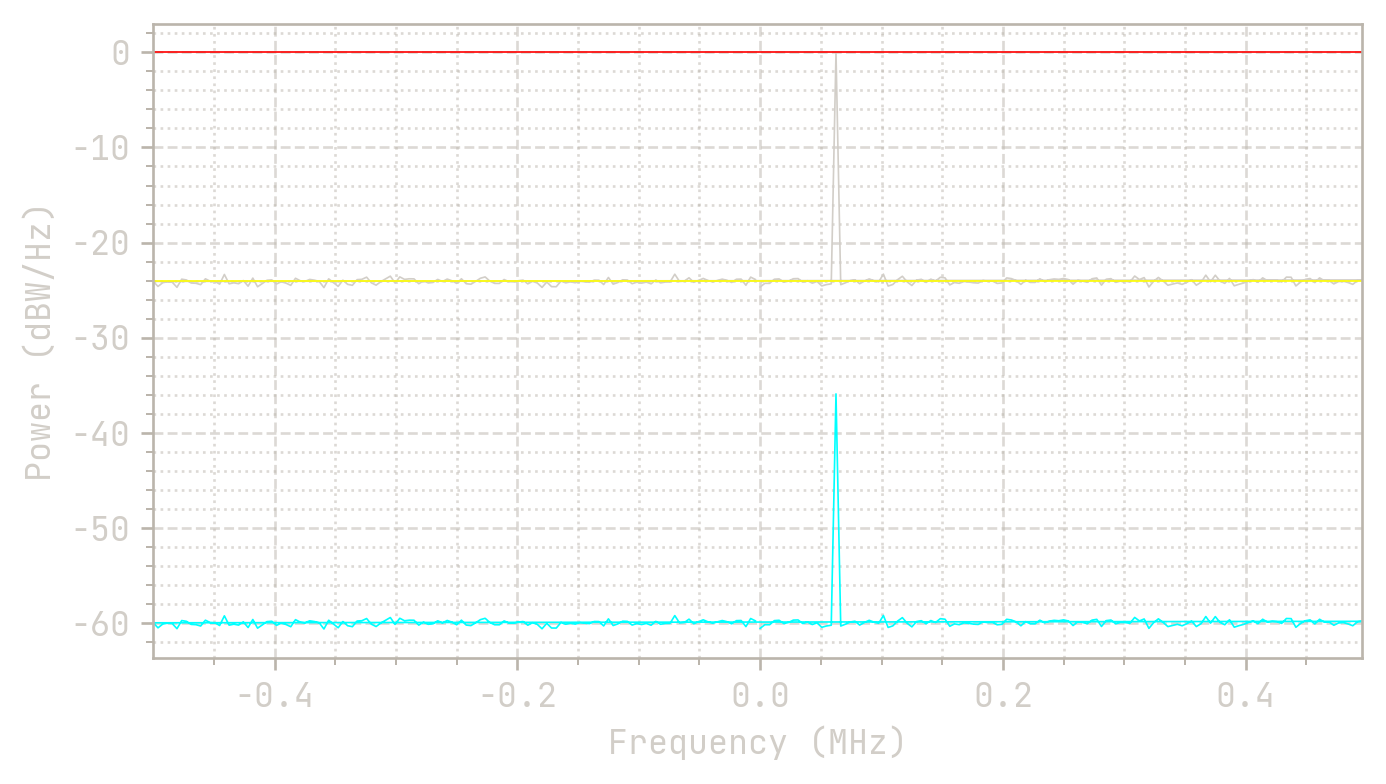

In [54]:
plt.figure(dpi=120, figsize = (6.5, 3.5))
plt.plot(frequencies, signal_psd_db - 10*np.log10(fs) + 10*np.log10(nfft), linewidth = 0.5, c = "cyan")
plt.plot(frequencies, signal_psd_db, linewidth = 0.5)
plt.hlines(y=np.max(10*np.log10(np.var(signal))), xmin = np.min(frequencies), xmax = np.max(frequencies), linewidths = 0.5, colors = 'r')
plt.hlines(y=10*np.log10(n0_display), xmin = np.min(frequencies), xmax = np.max(frequencies), linewidths = 0.5, colors = 'yellow')
plt.gca().minorticks_on()
plt.grid(which="minor", linestyle = ":", alpha = 0.5)
plt.grid(which="major", linestyle = "--", alpha = 0.5)
plt.xlim([np.min(frequencies), np.max(frequencies)])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBW/Hz)')
plt.savefig(f'{path}/psd_norm.svg', dpi=72, transparent=True, bbox_inches='tight')

In [40]:
10**(-24/10)*nfft

1.0191543566169532

In [402]:
np.std(4*np.sin(2*np.pi*f*t))

2.8284271247461894

In [400]:
np.sqrt(8)

2.8284271247461903